### 0. Введение

Нейронные сети достаточно прочно вошли в нашу жизнь. Благодаря им можно автоматически распознавать объекты на изображении, переводить тексты на множество различных языков, генерировать иллюстрации, разговаривать с голосовыми помощниками и т.п. На этом занятии мы научимся строить простые нейронные сети с помощью фреймворка **PyTorch**, а также разберемся в принципах его работы.

Существуют и другие фреймворки для работы с нейронными сетями, такие как TensorFlow, Theano, Caffe и т.д. Конечно, мы могли бы рассмотреть несколько фреймворков разом, но как говорил Брюс Ли: "Я не боюсь того, кто изучает 10,000 различных ударов. Я боюсь того, кто изучает один удар 10,000 раз." Поэтому мы остановимся на одном &mdash; PyTorch, чтобы отработать на нем навыки построения и обучения нейронных сетей.

Выбор в пользу PyTorch обусловлен несколькими факторами. Во-первых, он достаточно прост для изучения благодаря интуитивно понятному синтаксису, близкому к NumPy. Более того, он соблюдает баланс между простотой написания кода и гибкостью при построении новых моделей, чем выгодно отличается от других фреймворков. Также PyTorch &mdash; open source проект с большой командой поддержки и имеет подробную и понятную документацию. Благодаря всем перечисленным качествам он стал особенно популярен среди исследователей.

Как установить PyTorch можно прочитать на [официальном сайте PyTorch](http://pytorch.org/). Для этого выберите свою OS и вам будет показана нужная команда для ввода в терминале.

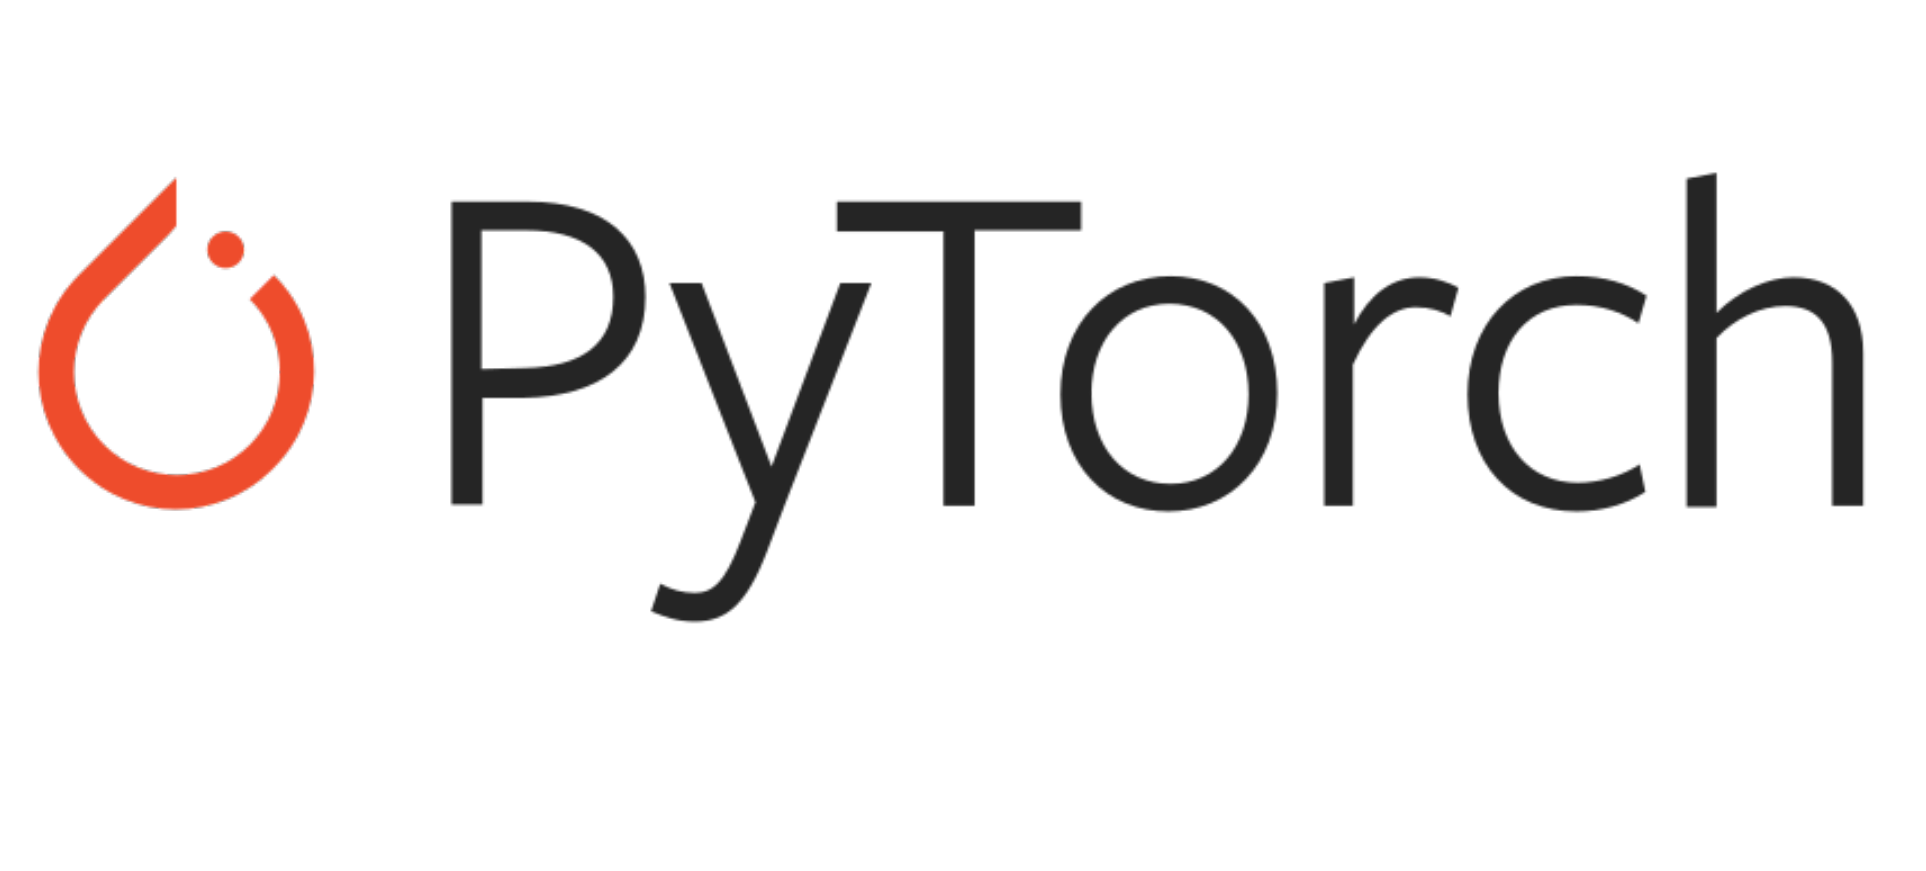

### 1. Тензоры

Для хранения данных, будь то параметры, вход или выход модели, в PyTorch используется специальная структура данных, назывемая **тензором**. Тензоры очень _похожи на Numpy массивы_. Причем они могут разделять одну и ту же область памяти без необходимости копирования. Тензоры отличаются тем, что они _могут работать на GPU и других аппаратных ускорителях_. Более того, тензоры _оптимизированы для автоматического дифференцирования_.

In [2]:
import os
import gc
from time import time

import numpy as np
import matplotlib.pyplot as plt
import torch

#### 1.1 Инициализация
Мы можем задать тензор несколькими способами.

* _Напрямую из данных_. При этом мы можем задать тип данных в тензоре.

Инициализация с параметрами по умолчанию

In [3]:
data = [[1, 2], [3, 4]]
t1 = torch.tensor([data])
t1, t1.dtype

(tensor([[[1, 2],
          [3, 4]]]),
 torch.int64)

Инициализация с заданным типом.

In [4]:
t2 = torch.tensor(data, dtype=torch.float32)
t2, t2.dtype

(tensor([[1., 2.],
         [3., 4.]]),
 torch.float32)

* _Константными или случайными значениями_.

In [5]:
shape = (2, 3)
t_zeros = torch.zeros(shape)
print(f"Тензор из нулей: \n {t_zeros} \n")

t_ones = torch.ones(shape)
print(f"Тензор из единиц: \n {t_ones} \n")

t_rand = torch.rand(shape)
print(f"Случайный тензор: \n {t_rand} \n")

Тензор из нулей: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 

Тензор из единиц: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Случайный тензор: 
 tensor([[0.9830, 0.2526, 0.7923],
        [0.6587, 0.7123, 0.9608]]) 



* _Константными или случайными значениями из другого тензора_.

In [6]:
t = torch.tensor([data])

t_empty = torch.empty_like(t)

t_zeros = torch.zeros_like(t)
print(f"Тензор из нулей: \n {t_zeros} \n")

t_ones = torch.ones_like(t)
print(f"Тензор из единиц: \n {t_ones} \n")

t_rand = torch.rand_like(t, dtype=torch.float)
print(f"Случайный тензор: \n {t_rand} \n")

Тензор из нулей: 
 tensor([[[0, 0],
         [0, 0]]]) 

Тензор из единиц: 
 tensor([[[1, 1],
         [1, 1]]]) 

Случайный тензор: 
 tensor([[[0.0085, 0.4708],
         [0.8032, 0.9120]]]) 



* _Из numpy массива с помощью_ `torch.from_numpy`. При такой инициализации, NumPy массив и PyTorch тензор имеют дело с одной и той же областью памяти. Если поменять массив, то поменяется и тензор.

In [7]:
n = np.array(data)

t = torch.from_numpy(n)
print(f"Тензор после специальной инициализации: \n {t} \n")

n += 5
print(f"Тензор после увеличения на 5 исходного NumPy массива: \n {t} \n")

Тензор после специальной инициализации: 
 tensor([[1, 2],
        [3, 4]]) 

Тензор после увеличения на 5 исходного NumPy массива: 
 tensor([[6, 7],
        [8, 9]]) 



При этом, если мы инициализируем из NumPy массива с помощью `torch.tensor`, то тензор будет работать с другой областью памяти, и при изменении массива, тензор меняться не будет.

In [8]:
n = np.array(data)

t = torch.tensor(n)
print(f"Тензор после инициализации: \n {t} \n")

n += 5
print(f"Тензор после увеличения на 5 исходного NumPy массива: \n {t} \n")

Тензор после инициализации: 
 tensor([[1, 2],
        [3, 4]]) 

Тензор после увеличения на 5 исходного NumPy массива: 
 tensor([[1, 2],
        [3, 4]]) 



#### 1.2 Еще немного про связь с NumPy

Тензор можно перевести в NumPy массив с помощью `.numpy()`. Область памяти будет та же, что у тензора.

In [9]:
t = torch.ones((2, 3))

n = t.numpy()
print(f"NumPy массив после, полученный из тензора: \n {n} \n")

t *= 7
print(f"NumPy массив после увеличения в 7 раз исходного тензора: \n {n} \n")

NumPy массив после, полученный из тензора: 
 [[1. 1. 1.]
 [1. 1. 1.]] 

NumPy массив после увеличения в 7 раз исходного тензора: 
 [[7. 7. 7.]
 [7. 7. 7.]] 



#### 1.3 Операции над тензорами
Многие функции над тензорами имеют такую же сигнатуру что и функции над NumPy массивами.

In [10]:
t = torch.ones((2, 3))
t

tensor([[1., 1., 1.],
        [1., 1., 1.]])

Изменение значений по по заданным координатам.

In [11]:
t[:, 0] = 0
t

tensor([[0., 1., 1.],
        [0., 1., 1.]])

Вычисление среднего и суммы. Кстати, для многих операций оси можно задавать как с помощью аргумента `dim`, так и привычного `axis`.

In [12]:
torch.mean(t, dim=0), torch.sum(t, axis=0)

(tensor([0., 1., 1.]), tensor([0., 2., 2.]))

Различные арифметические операции.

In [13]:
print(t + 5, t ** 2, torch.sqrt(t), torch.exp(t), sep='\n')

tensor([[5., 6., 6.],
        [5., 6., 6.]])
tensor([[0., 1., 1.],
        [0., 1., 1.]])
tensor([[0., 1., 1.],
        [0., 1., 1.]])
tensor([[1.0000, 2.7183, 2.7183],
        [1.0000, 2.7183, 2.7183]])


Транспонирование.

In [14]:
t.T

tensor([[0., 0.],
        [1., 1.],
        [1., 1.]])

Матричное умножение.

In [15]:
t @ t.T

tensor([[2., 2.],
        [2., 2.]])

Конкатенация. Можно задать ось, по дефолту она нулевая.

In [16]:
torch.cat([t, t])

tensor([[0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]])

Объединение (stack) тензоров. Можно задать ось, по дефолту она нулевая.

In [17]:
torch.stack([t, t], dim=1)

tensor([[[0., 1., 1.],
         [0., 1., 1.]],

        [[0., 1., 1.],
         [0., 1., 1.]]])

In [18]:
t = torch.randn((2, 3, 1))
t

tensor([[[-0.1503],
         [ 0.0871],
         [-0.9449]],

        [[-1.8599],
         [ 0.5026],
         [-0.1557]]])

Перестановка осей: аналог `np.transpose` &mdash; `.permute()`.

In [19]:
t.permute(2, 0, 1).shape

torch.Size([1, 2, 3])

Приведение тензора к тензору с одной размерностью.

In [20]:
t.flatten(), t.ravel()

(tensor([-0.1503,  0.0871, -0.9449, -1.8599,  0.5026, -0.1557]),
 tensor([-0.1503,  0.0871, -0.9449, -1.8599,  0.5026, -0.1557]))

Добавление размерности, нужно указывать ось.

In [21]:
t.unsqueeze(dim=0).shape

torch.Size([1, 2, 3, 1])

Удаление лишней размерности.

In [22]:
t.squeeze().shape

torch.Size([2, 3])

Изменение размера.

In [23]:
t.reshape(1, 6).shape

torch.Size([1, 6])

Копирование тензора. Подробнее про копирование расписано в конце ноутбука.

In [24]:
u = t.clone()
u

tensor([[[-0.1503],
         [ 0.0871],
         [-0.9449]],

        [[-1.8599],
         [ 0.5026],
         [-0.1557]]])

#### 1.4 Упражнение

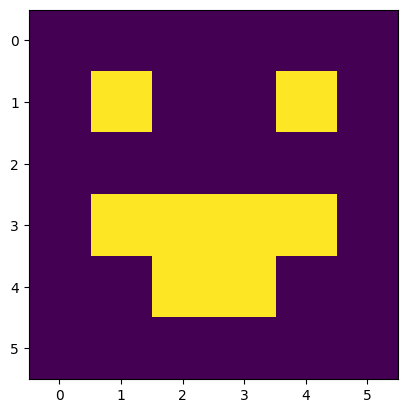

In [32]:
# Создать тензор t1 размера 3 x 3 из нулей
t1 = torch.zeros((3, 3))
# Приравнять единице значения тензора t1 по координатам (1, 1)
t1[1, 1] = 1
# Скопировать тензор t1 в тензор t2
t2 = t1.clone()
# Конкатенировать тензоры t1 и t2 по размерности 1 и записать результат в тензор t3
t3 = torch.cat([t1, t2], dim=1)
# Создать тензор t4 размера 6 из нулей
t4 = torch.zeros((6, ))
# Заполнить все единицами кроме нулевой и последней ячейки в тензоре t4
t4[1:-1] = 1
# Создать тензор t5 размера 6 из единиц
t5 = torch.ones((6, ))
# Заполнить ячейки с координатами 2 и 3 нулями в тензоре t5
t5[2] = t5[3] = 0
# От 1 отнять тензор t5 и записать результат в тензор t5
t5 = 1 - t5
# Объединить (стакнуть) тензоры t4 и t5 и записать результат в t6
t6 = torch.stack([t4, t5])
# Создать тензор t7 из 6 нулей и добавить к нему дополнительную размерность по нулевой оси
t7 = torch.zeros((6, )).unsqueeze(dim=0)
# Конкатенировать тензоры t3, t6 и t7 в тензор t8
t8 = torch.cat([t3, t6, t7])

plt.imshow(t8)

#### 1.5 Работа с CUDA

[CUDA](https://developer.nvidia.com/cuda-zone) &mdash; это библиотека от компании Nvidia, написанная на C/С++ и позволяющая работать с графическими процессорами (GPU) от Nvidia. В частности, быстро выполнять на них операции линейной алгебры: mat-vec умножение, mat-mat умножение, разложения матриц и т.д. Работа с нейросетями на GPU значительно быстрее чем на CPU.

Сейчас мы работаем в среде Google Colab, где есть бесплатный но ограниченный доступ к GPU. Для того, чтобы подключить GPU, зайдите в меню `Среда выполнения`, выберите опцию `Cменить среду выполнения`. В списке аппаратных ускорителей выберите GPU. С каждым годом Colab все больше ограничивает работу на на своих машинах, поэтому придется привыкнуть к страданиям...

**Совет: пишите все так, чтобы работало корректно на CPU, а затем проверяйте на GPU.**

PyTorch умеет работать с GPU, для этого ему нужно об этом явно сказать. Например, чтобы создать копию переменной `t` на CUDA (GPU), нужно сделать  `t.cuda()`, тогда вернется **копия** переменной, размещенная в видеопамяти GPU, а не в оперативной памяти CPU.

Если вы получаете ошибку `RuntimeError: cuda runtime error (100) : no CUDA-capable device is detected`, то у вас или нет графической карты, или стоят старые драйвера для нее, или нет библиотеки CUDA.

Проверим, что мы подключены к среде, где есть доступ к CUDA.

In [33]:
use_cuda = torch.cuda.is_available()
use_cuda

False

С помощью команды nvidia-smi можно посмотреть устройства, которые доступны CUDA.

In [34]:
!nvidia-smi

/bin/bash: строка 1: nvidia-smi: команда не найдена


Некоторые характеристики можно получить с помощью функций PyTorch.

In [ ]:
if use_cuda:
    print('Версия CUDNN:', torch.backends.cudnn.version())
    print('Количество доступных GPU:', torch.cuda.device_count())
    print('Название GPU 0:',torch.cuda.get_device_name(0))
    print('Количество памяти GPU 0 [GB]:',torch.cuda.get_device_properties(0).total_memory / 1e9)

Узнаем, сколько памяти сейчас занято.

In [ ]:
torch.cuda.memory_allocated()

Зададим тензор на GPU.

In [ ]:
t = torch.empty((2, 3), device='cuda')
t.device

Посмотрим, сколько памяти на CUDA теперь занято.

In [ ]:
torch.cuda.memory_allocated()

Удалим тензор.

In [ ]:
del t

Теперь память освободилась.

In [ ]:
torch.cuda.memory_allocated()

Посмотрим, сколько всего памяти было занято на GPU за все время работы ноутбука.

In [ ]:
torch.cuda.max_memory_allocated()

Тензоры можно переносить с CPU на GPU с помощью метода `.to()`.

In [ ]:
t = torch.empty((2, 3))
t = t.to('cuda:0')
torch.cuda.memory_allocated()

А можно наоборот &mdash; с GPU на CPU.

In [ ]:
t = t.to('cpu')
torch.cuda.memory_allocated()

Опасно создавать какие-то тензоры без сохранения их в переменную. Очистить занятую память каким-то простым способом не получится.

In [ ]:
torch.empty((2, 3), device="cuda:0")

In [ ]:
torch.cuda.memory_allocated()

Переводить с CPU на CUDA и наоброт можно с помощью специальных методов. Посмотреть устройство, на котором аллоцирована память для данных тензора можно с помощью атрибута `device`.

In [ ]:
t = torch.empty((2, 3))
t = t.cuda()
t.device

In [ ]:
t = t.cpu()
t.device

Иногда полезно очищать кэш, который занимается PyTorch, например, во время обучения с помощью `torch.cuda.empty_cache()`. В Python сборщик мусора запускается автоматически для очистки объектов, на которые больше нет ссылок. Однако в некоторых случаях может потребоваться немедленная принудительная сборка мусора. Это можно сдедать с помощью `gc.collect()`.

In [ ]:
t = t.cuda()
torch.cuda.memory_reserved()

In [ ]:
del t
torch.cuda.memory_reserved()

In [ ]:
torch.cuda.empty_cache()
gc.collect() # очистится и без этой строки
torch.cuda.memory_reserved()

Если у вас есть видеокарта Nvidia, то можно установить Cuda локально по [инструкции](https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html). Чтобы узнать, если у вас видеокарта Nvidia, на Windows нажмите "Window + R" и введите `dxdiag`. На Linux введите `lspci` и ищите строки с ключевыми словами controller / vga / 3D. Учтите, что процесс установки CUDA занимает в среднем не менее часа, к тому же, при установке могут возникнуть разного рода проблемы, которые решаются нетривиальным способом... Также имейте в виду, что вы будете ограничены размерами вашей видеокарты.

Если видеокарты нет, то придется прибегнуть к облачным ресурсам. Кроме Google Colab есть Kaggle, на котором тоже есть бесплатный и ограниченный доступ к ресурсам GPU. С его настройкой на этом занятии мы разбираться не будем. Также для общего сведения, существуют платные ресурсы с видеокартами, такие как *Yandex DataSphere* и *ML Space*.

### 2. Автоматический подсчет градиентов

Установим библиотеку для визуализации вычислительного графа. Что это такое будет объяснено далее.

In [ ]:
!pip install torchviz

In [ ]:
import torchviz

Наиболее частым методом для обучения нейронных сетей является **метод обратного распространения ошибки / back propagation**. Он подразумевает обновление параметров нейронной сети в соотвествии с градиентов функции потерь по отношению к заданному параметру.

Для вычисления этих градиентов в PyTorch есть встроенный механизм дифференцирования под названием `torch.autograd`. Этот механизм поддерживает **вычислительный граф**, который сохраняет операции, произведенные над данными по мере выполнения операций. Таким образом граф **строится динамически**, а значит мы можем менять структуру нейронной сети даже во время обучения. Полученный граф представляет собой ориентированный ациклический граф, **листья которого являются входными тензорами**, а **корни - выходными тензорами**. Следуя по графу от корней к листьям, вы можете **автоматически вычислять градиенты**, используя правило цепочки.


<img src="https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/dynamic_graph.gif" width=1200 style="padding-left:300px;padding-top:10px">

Параметр `requires_grad` указывает `torch.autograd` на то, что у данного тензора нужно отслеживать градиенты. Во время прямого прохода операция записывается в граф, если хотя бы один тензор требует подсчета градиентов.

При инициализации тензора по дефолту этот параметр имеет значение `False`.

In [ ]:
x = torch.ones(3)
x.requires_grad

Чтобы градиенты стали отслеживаться, нужно это явно указать. Например, можно у имеющегося тензора поменять значение параметра `requires_grad` на `True`.

In [ ]:
x.requires_grad = True
x.requires_grad

Можно этот параметр задать при инициализации тензора.

In [ ]:
x = torch.ones(3, requires_grad=True)
x.requires_grad

`requires_grad = True` &mdash; заразный, что логично исходит из правила цепочки для подсчета градиентов.


In [ ]:
x = torch.empty(2, requires_grad=False)
y = torch.empty(2, requires_grad=True)
z = x + y
z.requires_grad

Соотвественно, если оба тензора не требуют градиентов, то и итоговый тоже не будет.

In [ ]:
x = torch.empty(2, requires_grad=False)
y = torch.empty(2, requires_grad=False)
z = x + y
z.requires_grad

#### 2.1 Визуализация вычислительного графа
Зададим небольшую модель.

In [ ]:
x = torch.randn(2)
y = torch.randn(2)
w = torch.ones(2, requires_grad=True)
b = torch.zeros(2, requires_grad=True)
f = x * w + b
z = torch.mean((f - y) ** 2)

Визуализируем вычислительный граф.

In [ ]:
torchviz.make_dot(z, params = {'w': w, 'b': b, 'z': z})

#### 2.2 Автоматический подсчет градиентов
Прежде чем перейти к подсчету градиентов, определим, что такое лист в вычислительном графе `torch.autograd`. Зададим небольшую модель и посмотрим, какие переменные определились в качестве листьев. Это можно узнать, вызывав атрибут `is_leaf`.

In [ ]:
for tensor, name in zip((x, y, w, b, f, z), ('x', 'y', 'w', 'b', 'f', 'z')):
    print(f'{name} is_leaf = {tensor.is_leaf}')

Как мы видим, листовыми вершинами являются те переменные, которые либо не требуют трека градиента, либо те, что были только инициализированы. Это и есть входы в модель.

Градиенты для тензора накапливаются в атрибуте `grad`. Градиенты не могут быть посчитаны в атрибуте для нелистовых вершин графа, а также для тех вершин, для которых `requires_grad=False`. Будем рассматривать градиенты только для листовых вершин с `requires_grad=True`.

In [ ]:
for tensor, name in zip((w, b), ('w', 'b')):
    print(f'{name} grad = {tensor.grad}')

Для того, чтобы получить градиенты, нужно сделать обратный проход с помощью функции `backward`.

In [ ]:
z.backward()

In [ ]:
for tensor, name in zip((w, b), ('w', 'b')):
    print(f'{name} grad = {tensor.grad}')

Попробуем еще раз сделать обратный проход.

In [ ]:
z.backward()

Не получается, так как на прошлом обратном проходе граф уже очистился.

Сделаем прямой проход еще раз.

In [ ]:
f = x * w + b
z = torch.mean((f - y) ** 2)

Сделаем обратный проход.

In [ ]:
z.backward()

Посчитаем градиенты еще раз.

In [ ]:
for tensor, name in zip((w, b), ('w', 'b')):
    print(f'{name} grad = {tensor.grad}')

Значения удвоились, так как градиенты накопились за 2 цикла прохода графа. Чтобы обнулить градиенты нужно вызвать метод `zero_`.

In [ ]:
w.grad.zero_()
b.grad.zero_()

for tensor, name in zip((w, b), ('w', 'b')):
    print(f'{name} grad = {tensor.grad}')

#### 2.3 Отключение градиентов
Используя контекстный менеджер `torch.no_grad` мы можем вычислить что-либо без трека градиентов. Это нужно делать тогда, когда нет необходимости считать градиенты, например при проверке модели на валидационной части выборки.

In [ ]:
t = []
for _ in range(1000):
    t_start = time()

    # конекстный менеджер для отключения градиентов
    with torch.no_grad():
        f = x * w + b

    t.append(time() - t_start)
print(f'Time MEAN: {np.mean(t) * 1e6:.1f} ns, STD: {np.std(t) * 1e6:.1f} ns')

Градиентов у `f` нет.

In [ ]:
f.requires_grad

In [ ]:
torchviz.make_dot(f, params = {'w': w, 'b': b, 'f': f})

Сделаем то же самое без контекстного менеджера. Время выполнения немного увеличивается.

In [ ]:
t = []
for _ in range(1000):
    t_start = time()

    f = x * w + b

    t.append(time() - t_start)
print(f'Time MEAN: {np.mean(t) * 1e6:.1f} ns, STD: {np.std(t) * 1e6:.1f} ns')

Градиенты трекаются.

In [ ]:
f.requires_grad

Граф будет построен вместе со всеми входными данными.

In [ ]:
torchviz.make_dot(f, params = {'w': w, 'b': b, 'f': f})

С помощью `detach` можно отключить переменную от трека градиентов. По сути то же самое, что поставить `requires_grad=False`.

In [ ]:
f = x * w + b
f = f.detach()
f.requires_grad

In [ ]:
torchviz.make_dot(f, params = {'w': w, 'b': b, 'f': f})

#### 2.4 Корректное копирование тензоров

Попробуем использовать оператор `=`.

In [ ]:
x = torch.tensor(3.)
y = x

print('x', x, 'y', y)

y.fill_(8.)

print('x', x, 'y', y)

Тензоры не различимы. Добавим к `x` возможность подсчета градиентов.

In [ ]:
x.requires_grad = True
z = x + y * y

In [ ]:
torchviz.make_dot(z,  params = {'x': x, 'y': y, 'z': z} )

In [ ]:
z.backward()

print(f'z\tx.grad\ty.grad\n{z}\t{x.grad}\t{y.grad}')

Тензоры все абсолютно одинаковые.

Попробуем `.clone()`.

In [ ]:
x = torch.tensor(3.)
y = x.clone()

print('x', x, 'y', y)

y.fill_(8.)

print('x', x, 'y', y)

Тензоры различны.

Попробуем `.clone()` для тензора, для которого ведется подсчет градиентов.

In [ ]:
x = torch.tensor(3., requires_grad=True)
y = x.clone()

z = x + y * y

In [ ]:
torchviz.make_dot(z,  params = {'x': x, 'y': y, 'z': z} )

In [ ]:
y.requires_grad

In [ ]:
z.backward()

print(f'z\tx.grad\ty.grad\n{z}\t{x.grad}\t{y.grad}')

Градиентов для `y` нет.

Попробуем `clone` и `detach`. **Это самый безопасный способ клонирования**.

In [ ]:
x = torch.tensor(3., requires_grad=True)
y = x.detach().clone()

z = x + y * y

In [ ]:
torchviz.make_dot(z,  params = {'x': x, 'y': y, 'z': z} )

In [ ]:
y.requires_grad

`y` больше никак не связан с `x`.

In [ ]:
z.backward()

print(f'z\tx.grad\ty.grad\n{z}\t{x.grad}\t{y.grad}')

#### 2.5 Подсчет более сложных производных
В пакете `autograd` есть функция `grad`, которую модно использовать для подсчета более сложных производных.

* Главные аргументы
    * `outputs` &mdash; выходной тензор (который будет дифференцироваться)
    * `inputs` &mdash; входной тензор (по которому будет дифференцирование)
    * `create_graph` &mdash; нужно ли создать граф вычислений (нужно для производных высшего порядка)
    * `grad_outputs` &mdash; предпосчитанные градиенты по каждому `output`
* Возвращает `tuple` с интересующим тензором и дополнительной информацией.

Производные по одному аргументу.

In [ ]:
def f(x):
    return x**4

x = torch.tensor(1., requires_grad=True)
f_value = f(x)

gr = f_value
for i in range(1, 6):
    gr = torch.autograd.grad(outputs=gr, inputs=x, create_graph=True)[0]
    print(f'{i}-ая производная f по x: {gr}')

Смешанные производные.

In [ ]:
def f(x, y):
    return x**3 * y**4

x = torch.tensor(1., requires_grad=True)
y = torch.tensor(1., requires_grad=True)
f_value = f(x, y)

f_1x = torch.autograd.grad(outputs=f_value, inputs=x, create_graph=True)[0]
f_2xy = torch.autograd.grad(outputs=f_1x, inputs=y, create_graph=True)[0]

print(f'Смешанная производная d^2f/dx/dy: {f_2xy}')

Векторные производные.

In [ ]:
def f(x):
    return x[0]**4 - x[1]**4

x = torch.tensor([1., 3.], requires_grad=True)
f_value = f(x)

grad = torch.autograd.grad(outputs=f_value, inputs=x, create_graph=True)
print(f'Первая производная: {grad}')
for i in range(1, 5):
    grad = torch.autograd.grad(outputs=grad, inputs=x, create_graph=True, grad_outputs=torch.tensor([1,2]))
    print(f'{i}-ая производная f по x: {grad}')

#### 2.6 Упражнения

**Задача 1**

Посчитайте производную функции

$z = x^3$ в точке $x_0 = 1.0$

с помощью метода `.backward()`

**Задача 2**

Посчитайте производную функции

$z = 2 x^3 - y^2$ в точке $x_0 = 2.0$ и $y_0 = 6.0$

с помощью метода `.backward()`

**Задача 3**

Посчитайте *11 производную* функции

$z = x^{10}y^{5}$ в точке $x_0 = 1.0$ и $y_0 = 2$ по $x$

Также выведите все промежуточные производные

**Задача 4**

Посчитайте смешанную частную производную функции $\frac{\partial^2 f}{\partial x \partial y}$

$z = x^{10} y^{5}$ в точке $x_0 = 1.0$ и $y_0 = 2$